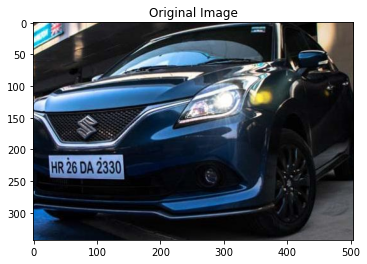

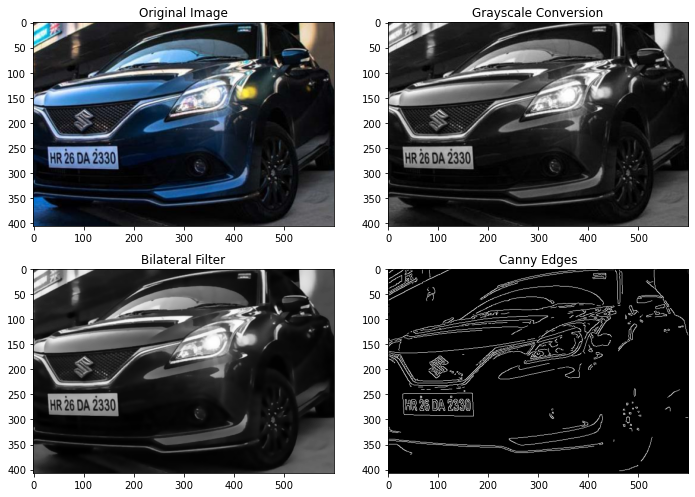

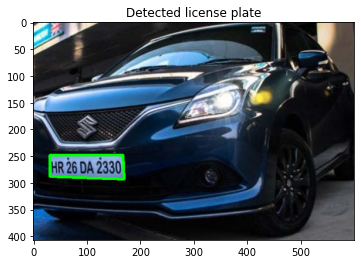

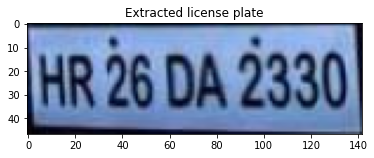

[[[168 248]]

 [[ 31 248]]

 [[ 31 288]]

 [[170 293]]]


In [ ]:
import numpy as np
import pandas as pd
import cv2
import imutils
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
from sklearn.metrics import f1_score

import tensorflow as tf
import tensorflow.keras.backend as K
from tensorflow.keras import optimizers

from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tkinter import*
from PIL import Image, ImageTk
from tkinter import filedialog
from shutil import copyfile
global filename

def quitgui():
    root.destroy()
def DetectLicenceNumberPlate():
    #root.destroy()
    filename = filedialog.askopenfilename(initialdir = "/",title = "select a file", filetypes = (("Text files","*.txt*"),("all files","*.*")))
    # Read the image file
    image = cv2.imread(filename)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.show()

    image = imutils.resize(image, width=600)
    img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the original image
    fig, ax = plt.subplots(2, 2, figsize=(10,7))
    ax[0,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0,0].set_title('Original Image')

    # RGB to Gray scale conversion
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ax[0,1].imshow(gray, cmap='gray')
    ax[0,1].set_title('Grayscale Conversion')

    # Noise removal with iterative bilateral filter(removes noise while preserving edges)
    gray = cv2.bilateralFilter(gray, 11, 17, 17)
    ax[1,0].imshow(gray, cmap='gray')
    ax[1,0].set_title('Bilateral Filter')

    # Find Edges of the grayscale image
    edged = cv2.Canny(gray, 170, 200)
    ax[1,1].imshow(edged, cmap='gray')
    ax[1,1].set_title('Canny Edges')

    fig.tight_layout()
    plt.show()

    # Find contours based on Edges
    cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] #sort contours based on their area keeping minimum required area as '30' (anything smaller than this will not be considered)
    NumberPlateCnt = None #we currently have no Number plate contour
    # loop over our contours to find the best possible approximate contour of number plate
    count = 0
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  # Select the contour with 4 corners
            NumberPlateCnt = approx #This is our approx Number Plate Contour
            x,y,w,h = cv2.boundingRect(c)
            ROI = img[y:y+h, x:x+w]
            break

    if NumberPlateCnt is not None:
        # Drawing the selected contour on the original image
        cv2.drawContours(image, [NumberPlateCnt], -1, (0,255,0), 3)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Detected license plate")
    plt.show()

    # Find bounding box and extract ROI
    plt.imshow(ROI)
    plt.title("Extracted license plate")
    plt.show()
    print(NumberPlateCnt)

global root
root=Tk()
root.title("Automatic Licence Number Plate Detection")
#root.geometry("500x500")
f1=Frame(root,bg="lightblue",borderwidth=6,relief=GROOVE)
f1.pack(side=TOP,fill=X)
f2=Frame(root,bg="lightblue",borderwidth=6,relief=GROOVE)
f2.pack(side=TOP,fill=X)
Label(f1,text="Welcome to Automatic Licence Number Plate Detection",fg="black",bg="white",font="Timesnewroman 20 bold").pack()

btn1=Button(root,text="Detect Licence Number Plate",command=DetectLicenceNumberPlate,height=2,width=30,bg='pink',font="Timesnewroman 16 bold",pady=10)
btn1.pack()

Button(root,text="Quit",command=quitgui,height=2,width=20,bg='red',font="Timesnewroman 16 bold",pady=10).pack()
root.mainloop()

